## USArrest Data

[USArrest Data](https://raw.githubusercontent.com/gulinan/ISLR-python/master/Notebooks/Data/USArrests.csv) contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also the percent of the population living in urban areas is given.

A data frame with 50 observations on 4 variables:

   * `Assault`: Assault arrests (per 100,000),
   * `Murder`: Murder arrests (per 100,000), 
   * `Rape`: Rape arrests (per 100,000), and
   * `UrbanPop`: The percent of the population in each state living in the urban areas.

In [1]:
#required libraries
import pandas as pd
df = pd.read_excel('datasets/USArrests.xlsx', index_col=0, header=0)
df.head(10)

,Assault,Murder,Rape,UrbanPop
Alabama,236,13.2,21.2,58
Alaska,263,10.0,44.5,48
Arizona,294,8.1,31.0,80
Arkansas,190,8.8,19.5,50
California,276,9.0,40.6,91
Colorado,204,7.9,38.7,78
Connecticut,110,3.3,11.1,77
Delaware,238,5.9,15.8,72
Florida,335,15.4,31.9,80
Georgia,211,17.4,25.8,60


In [2]:
#data shape
df.shape

(50, 4)

## Exploratory Data Analysis
Pairwise scatter plot of four features reveals that **crime related three features** are correlated with each other, whereas these three features have a **weak relationship** with Urban population.

C:\Users\TJ\AppData\Local\Temp\ipykernel_14180\874408177.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


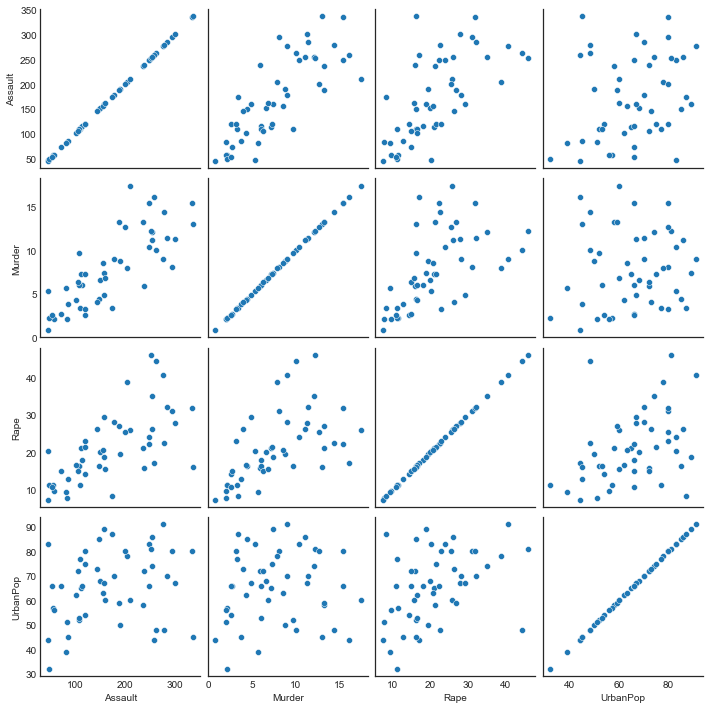

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [26, 14]
plt.style.use('seaborn-white')

sns.pairplot(df, vars = ['Assault', 'Murder', 'Rape', 'UrbanPop'], diag_kind = None);

In fact, we can see what we observed in the plots in the correlation matrix results.

In [4]:
#get the correlation matrix
df.corr()

,Assault,Murder,Rape,UrbanPop
Assault,1.000000,0.801873,0.665241,0.258872
Murder,0.801873,1.000000,0.563579,0.069573
Rape,0.665241,0.563579,1.000000,0.411341
UrbanPop,0.258872,0.069573,0.411341,1.000000


When we calculate the basic statistics of each feature, we can see that the sample mean and sample standard deviation of each feature are different from each other.

Spefically, the `Assault` variable has the **largest mean** and the **largest spread** compared to other three variables. 

In [5]:
#get basic sample statistics for each feature
df.describe()

,Assault,Murder,Rape,UrbanPop
count,50.000000,50.00000,50.000000,50.000000
mean,170.760000,7.78800,21.232000,65.540000
std,83.337661,4.35551,9.366385,14.474763
min,45.000000,0.80000,7.300000,32.000000
25%,109.000000,4.07500,15.075000,54.500000
50%,159.000000,7.25000,20.100000,66.000000
75%,249.000000,11.25000,26.175000,77.750000
max,337.000000,17.40000,46.000000,91.000000


## Pre-processing

* If we perform PCA on unscaled variables, the first principal component loading vector will have a very large loading for `Assault` variable since this variable has the largest variance, while the second principal component loading vector will place almost all of its weight on `UrbanPop`. 
* To eliminate this problem, we typically standardize each feature so that each one has **zero mean** and **unit variance** before we perform PCA.

In [6]:
from sklearn import set_config
set_config(transform_output="pandas") 

In [7]:
#import
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_sd = scaler.fit_transform(df)

In [8]:
df_sd.head()

,Assault,Murder,Rape,UrbanPop
Alabama,0.790787,1.255179,-0.003451,-0.526195
Alaska,1.118060,0.513019,2.509424,-1.224067
Arizona,1.493817,0.072361,1.053466,1.009122
Arkansas,0.233212,0.234708,-0.186794,-1.084492
California,1.275635,0.281093,2.088814,1.776781


In [9]:
#get basic sample statistics for each feature
df_sd.describe()

,Assault,Murder,Rape,UrbanPop
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.387779e-16,-7.105427e-17,8.593126e-16,-4.396483e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.524362e+00,-1.620693e+00,-1.502548e+00,-2.340661e+00
25%,-7.486054e-01,-8.611383e-01,-6.640245e-01,-7.704502e-01
50%,-1.425453e-01,-1.247758e-01,-1.220847e-01,3.210209e-02
75%,9.483628e-01,8.029251e-01,5.330962e-01,8.521012e-01
max,2.015028e+00,2.229265e+00,2.671197e+00,1.776781e+00


Note 1: For effective teaching, I did not prefer to chain StandardScaler with PCA through make_pipeline. However, pipelines are highly suggested in applications.

## Implementation of Principal Component Analysis

- We will use scikit-learn's [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class from **decomposition** module and get the loading vectors (rotation matrix) first. The most commonly used argument is: 
  - `n_components=None`: Number of components to keep. if n_components is not set all components are kept.

For illustration on how to use PCA, I will not assign any value to `n_components`.

In [10]:
#instantiate the pca object
from sklearn.decomposition import PCA

#instantiate the pca class
pca = PCA()

print(pca)

PCA()


Then, we can learn the **rotation** matrix with `fit` method.

In [11]:
#learn the rotation matrix
pca.fit(df_sd)

PCA()

## Rotation Matrix

We can return the **rotation matrix** with `components_` attribute as follows:

In [12]:
#rotation matrix requires ndarray of shape (n_features,n_components)
#for that reason get the transpose of this output
pca.components_.T

array([[ 0.58318363,  0.1879856 , -0.26814843, -0.74340748],
       [ 0.53589947,  0.41818087, -0.34123273,  0.6492278 ],
       [ 0.54343209, -0.16731864,  0.81777791,  0.08902432],
       [ 0.27819087, -0.87280619, -0.37801579,  0.13387773]])

Since it is not easy to read the output above, we can convert into a data frame and add row and column names to increase readability.

In [13]:
#Rotation matrix
rot_mat = pd.DataFrame(pca.components_.T, 
                       index=df_sd.columns, 
                       columns=['Load_vec1', 'Load_vec2',  'Load_vec3', 'Load_vec4'])                                                                             
rot_mat

,Load_vec1,Load_vec2,Load_vec3,Load_vec4
Assault,0.583184,0.187986,-0.268148,-0.743407
Murder,0.535899,0.418181,-0.341233,0.649228
Rape,0.543432,-0.167319,0.817778,0.089024
UrbanPop,0.278191,-0.872806,-0.378016,0.133878


## Representation Matrix, Principal Components

We can display the **representation matrix**, in other words, **four principal scores for each state**, with `transform` method.

In [14]:
# Our Z, representation matrix. 
# Fit the PCA model and transform (standardized) X to get the principal components
rep_mat = pca.transform(df_sd)
rep_mat.columns = ["PC1", "PC2", "PC3", "PC4"]
                                          
rep_mat.iloc[0:5]

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


In [15]:
#data shape
rep_mat.shape

(50, 4)



- The value of the **first principle component** of $i$th state can be found as follows:

$$
Z_{i 1}=0.583184 X_{i, Assault} + 0.535899*X_{i, Murder} + 0.543432*X_{i, Rape} + 0.278191*X_{i, UrbanPop},
$$

- where $i=1,\ldots,50$.

In [16]:
#alabama pc1 score:
(0.583184*0.790787)+ (0.535899*1.255179) + (0.543432*-0.003451)+ (0.278191*-0.526195)

0.9855653996520002

- The value of the **second principle component** of $i$th state can be found as follows:

$$
Z_{i 2}=0.187986 X_{i, Assault} +  0.418181*X_{i, Murder} -0.167319*X_{i, Rape}-0.872806*X_{i, UrbanPop},
$$

- where $i=1,\ldots,50$.

- The value of the **third principle component** of $i$th state can be found as follows:

$$
Z_{i 3}=  -0.268148 X_{i, Assault} -0.341233*X_{i, Murder} + 0.817778*X_{i, Rape}-0.378016*X_{i, UrbanPop},
$$

- where $i=1,\ldots,50$.

- The value of the **fourth principle component** of $i$th state can be found as follows:

$$
Z_{i 4}=-0.743407 X_{i, Assault}+0.649228*X_{i, Murder}+ 0.089024*X_{i, Rape}+ 0.133878*X_{i, UrbanPop},
$$

- where $i=1,\ldots,50$.


## Interpretation of Loading Vectors and Coefficients

In our analysis, we can see that the first loading vector places approximately equal weight on `Assault`, `Murder`, and 
`Rape`, but with much less weight on `UrbanPop`. Hence, the **first component** roughly corresponds to a **measure of overall rates of serious crimes**.

The second loading vector places most of its weight on `UrbanPop` and much less weight on the other three features. Hence, the **second component** roughly corresponds to the level of **urbanization of the state**.

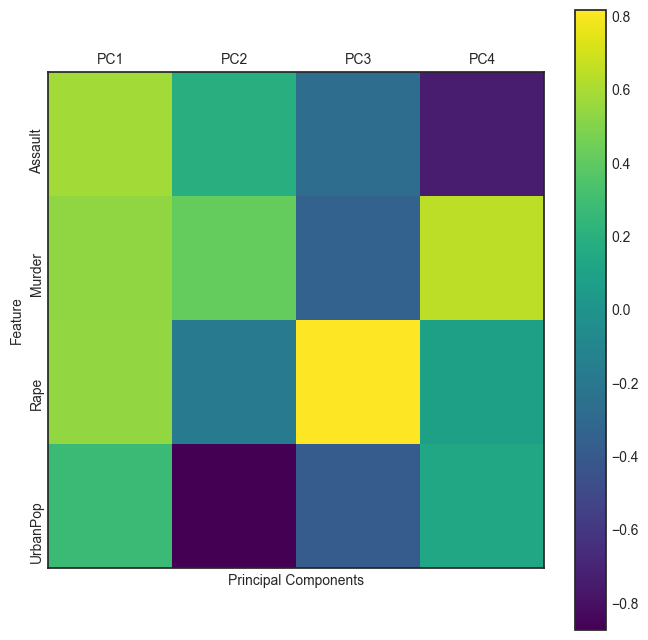

In [17]:
#visualize rotation matrix
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

plt.matshow(pca.components_.T, cmap="viridis")
plt.xticks([0,1,2,3], ["PC1", "PC2", "PC3", "PC4"])
plt.yticks(range(len(df.columns)), df_sd.columns, rotation=90, ha="right")
plt.xlabel("Principal Components")
plt.ylabel("Feature")
plt.colorbar()
plt.show();

## Correlation of Representation Matrix

Spoiler: We can see that the **columns of representation matrix**, in other works, principal components, have **zero correlation**.

In [18]:
#double check: correlation between four PC are zero.
rep_mat.corr().round(4)

,PC1,PC2,PC3,PC4
PC1,1.0,0.0,-0.0,0.0
PC2,0.0,1.0,-0.0,0.0
PC3,-0.0,-0.0,1.0,-0.0
PC4,0.0,0.0,-0.0,1.0


## Covariance of Representation Matrix

In [19]:
#double check: covariance matrix of four PCs is a diagonal matrix
rep_mat.cov().round(4)

,PC1,PC2,PC3,PC4
PC1,2.5309,0.00,-0.0000,0.000
PC2,0.0000,1.01,-0.0000,0.000
PC3,-0.0000,-0.00,0.3638,-0.000
PC4,0.0000,0.00,-0.0000,0.177


## Eigen-Decomposition of Covariance Matrix of Features

In [20]:
# apply svd on cov matrix of standardized X to obtain eigenvector and corresponding eigenvalues
import numpy as np

fi, d, fi_transpose = np.linalg.svd(np.cov(df_sd.T))

In [21]:
#do not worry about the signs, since eigenvectors are not unique.
#you may get different signs (not magnitudes) in different software for the same data set
#any multiple of an eigenvector is also an eigenvector
fi

array([[-0.58318363,  0.1879856 , -0.26814843, -0.74340748],
       [-0.53589947,  0.41818087, -0.34123273,  0.6492278 ],
       [-0.54343209, -0.16731864,  0.81777791,  0.08902432],
       [-0.27819087, -0.87280619, -0.37801579,  0.13387773]])

In [22]:
#vector of ordered eigenvalues
d

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [23]:
#fi matrix calculated by numpy and rot_mat calculated by scikit-learn differs by sign
rot_mat

,Load_vec1,Load_vec2,Load_vec3,Load_vec4
Assault,0.583184,0.187986,-0.268148,-0.743407
Murder,0.535899,0.418181,-0.341233,0.649228
Rape,0.543432,-0.167319,0.817778,0.089024
UrbanPop,0.278191,-0.872806,-0.378016,0.133878


## Total Variance

In [24]:
#total variance in  X: take a look the lecture notes for the formulas
np.trace(np.cov(df_sd.T))

4.081632653061225

In [25]:
#total variance in  Z: take a look the lecture notes for the formulas
np.sum(d)

4.081632653061224

In [26]:
#we can see that the columns of X has unit variance
#df_sd.var(ddof=1)
#we can see that the variance of each Z matrix column gives us the estimated eigenvalue
#which is the explained variance by the corresponding PC
#rep_mat.var(ddof=1)
#we can get the pca explained variance ratio
#rep_mat.var(ddof=1)/4

## Explained Variance by each PCA

In [27]:
#calculate the variance of each PC: same as the vector of eigenvalues
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [28]:
#calculate the ratio of variance of mth PC to the total variance in the data set.
#divide vector above by 4
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [29]:
#cumulative variance explained by PC's
np.cumsum(pca.explained_variance_ratio_)

array([0.62006039, 0.86750168, 0.95664248, 1.        ])

We can see that the **first principal component** explains 62.0% of the **variance in the data**, the second one explains 24.7% of the variance in the data.
Together, the **first two principal component** explains almost 87% of the variance in the data, and the last two principal components explain only 13% of the variance.
We can **keep the first two PCs to represent the whole data**.

## Scree plot

The left-hand panel is known as **scree plot**.

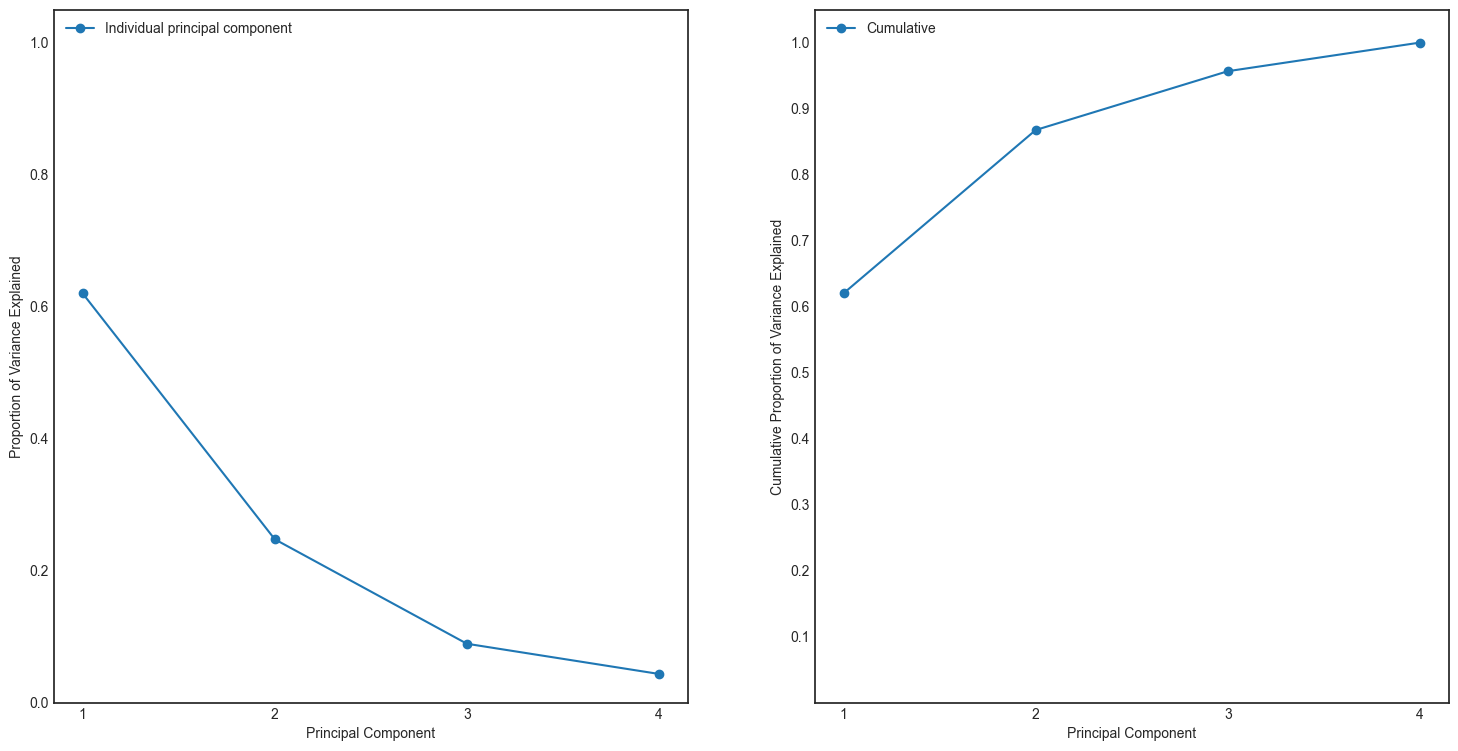

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [18, 9]

# Left-hand: Scree plot
plt.subplot(1, 2, 1)
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual principal component')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2)

# Right-hand: Cumalative Plot
plt.subplot(1, 2, 2)
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-o', label='Cumulative')


plt.ylabel('Cumulative Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.ylim(0,1.05)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.xticks([1,2,3,4])
plt.legend(loc=2)
plt.show();

Our transformed and dimensioned reduced data is as follows:

In [33]:
#instantiate the pca object
from sklearn.decomposition import PCA

#instantiate the pca class
pca = PCA(n_components=2)
pca.fit_transform(df_sd)[0:5]

,pca0,pca1
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934


## Biplots

* The below **biplot** shows that 50 states mapped according to the 2 principal components. 

* The four loading vectors are also plotted.

* We can see that crime related variables `Murder`, `Assault`, and `Rape` are located close to each other and that
the `UrbanPop` is far from the other three.

* The **large positive scores on the first component**, such as California, Nevada and Florida, have **high crime rates**, while states like North Dakota, with **negative scores** on the first component, have **low crime rates**.

* California also has a high score on the second component, indicating a high level of urbanization, while the opposite is true for states like Mississippi.

* States close to zero on both components, such as Indiana, have approximately average levels of both crime and urbanization.

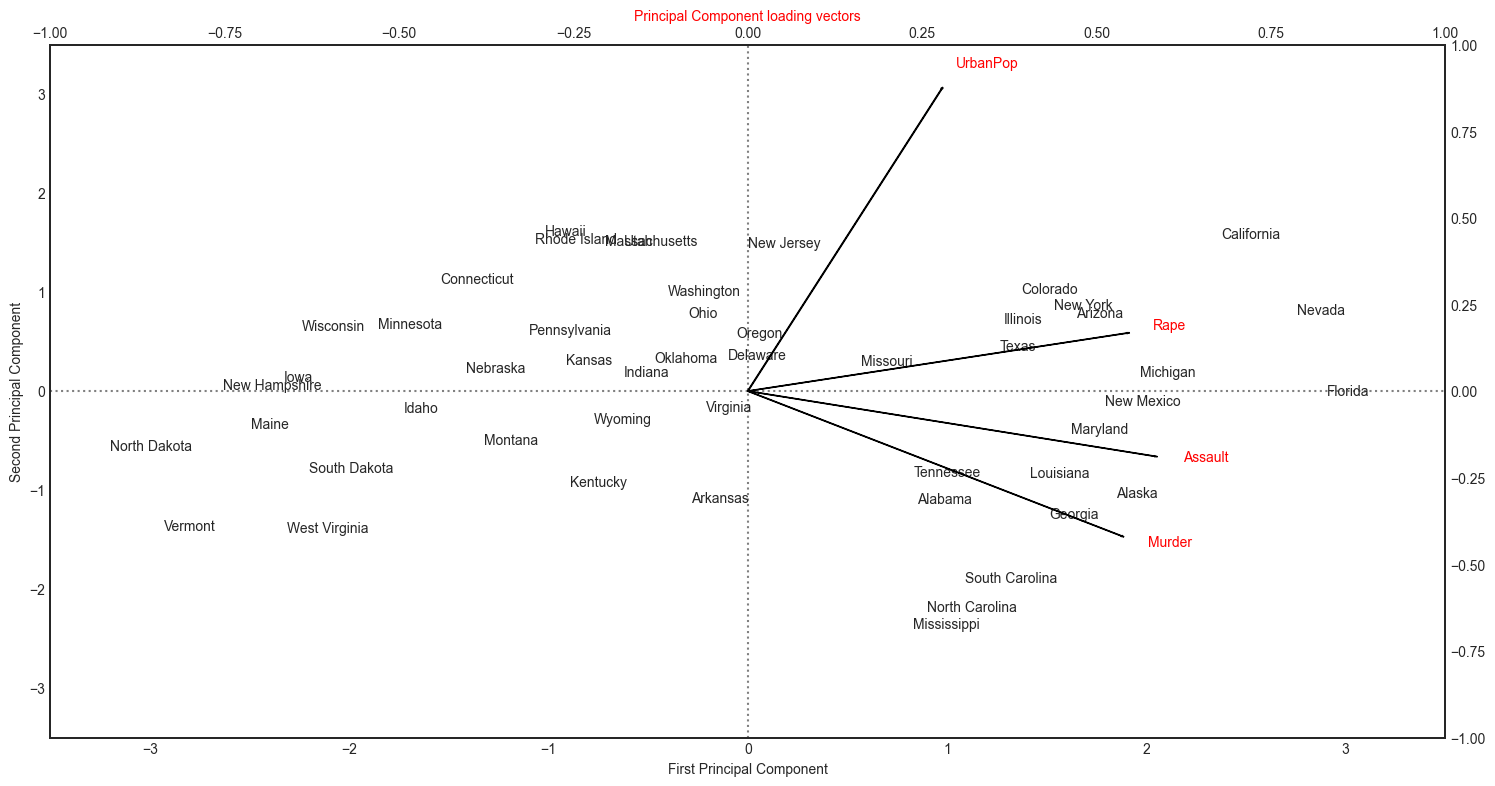

In [34]:
#change the direction of PC2 to increase variability
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [18, 9]

fig , ax1 = plt.subplots()

# Plot Principal Components 1 and 2
for i in rep_mat.index:
    ax1.annotate(i, (rep_mat.PC1.loc[i], -rep_mat.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    

# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='red')
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in rot_mat[['Load_vec1', 'Load_vec2']].index:
    ax2.annotate(i, (rot_mat.Load_vec1[i]*a, -rot_mat.Load_vec2[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,rot_mat.Load_vec1[0], -rot_mat.Load_vec2[0])
ax2.arrow(0,0,rot_mat.Load_vec1[1], -rot_mat.Load_vec2[1])
ax2.arrow(0,0,rot_mat.Load_vec1[2], -rot_mat.Load_vec2[2])
ax2.arrow(0,0,rot_mat.Load_vec1[3], -rot_mat.Load_vec2[3])
plt.show();

## Reference
- James, G., Witten, D., Hastie, T., and Tibshirani, R. (2021). An Introduction to Statistical Learning: With Applications in R. New York: Springer.
- https://github.com/gulinan/ISLR-python/blob/master/Notebooks/Chapter%2010.ipynb
- https://towardsdatascience.com/what-are-pca-loadings-and-biplots-9a7897f2e559
- https://rstudio-pubs-static.s3.amazonaws.com/377338_75ed92a8463d482a80045abcae0e395d.html

In [ ]:
import session_info
session_info.show()